In [266]:
import pandas as pd
import main_functions as functions
import importlib
import matplotlib.pyplot as plt

In [267]:
importlib.reload(functions)
fr_data = pd.read_csv('Data/Fertility rates.csv', skiprows=4)
dr_data = pd.read_csv('Data/Death rates.csv', skiprows=4)
covid_data = pd.read_csv('Data/WHO-COVID-19-global-data.csv')
polio_data = pd.read_csv('Data/the-number-of-reported-paralytic-polio-cases.csv')
hiv_data = pd.read_csv('Data/share-of-population-infected-with-hiv-ihme.csv')
iraq_death = pd.read_csv('Data/iraq-war-2003-2023.csv')
bt_death = pd.read_csv('Data/Battle-related-death.csv', skiprows=4)

Hypothesis one

In [268]:
usa_fr = functions.ext_sel_da(fr_data, 'USA', 1975, 2021)
chn_fr = functions.ext_sel_da(fr_data, 'CHN', 1975, 2021)

In [269]:
usa_covid = functions.ext_sel_covid(covid_data, 'US')

In [270]:
chn_polio = functions.ext_sel_polio(polio_data, 'CHN')

In [271]:
usa_hiv = functions.ext_sel_hiv(hiv_data, 'USA')

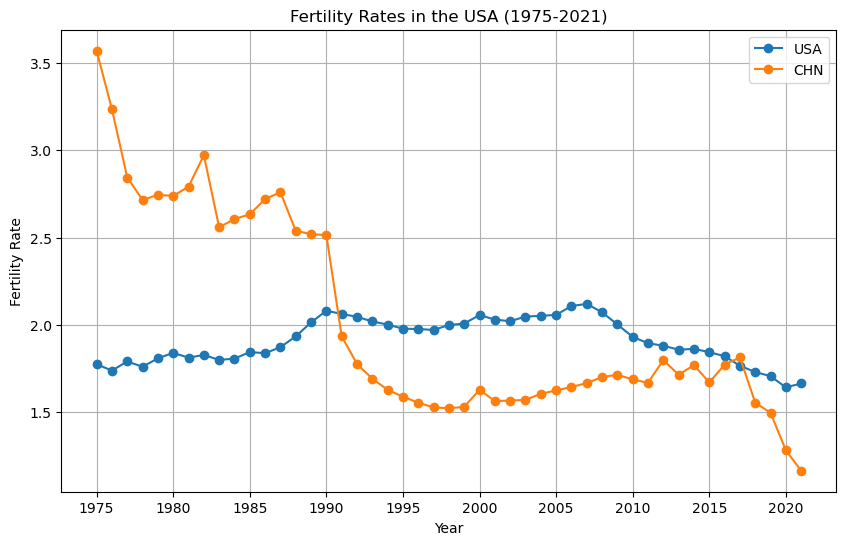

In [272]:
fr_years = list(map(int, usa_fr.keys()))
usa_rates = list(usa_fr.values())
chn_rates = list(chn_fr.values())
plt.figure(figsize=(10, 6))
plt.plot(fr_years, usa_rates, label = 'USA', marker='o')
plt.plot(fr_years, chn_rates, label = 'CHN', marker='o')
plt.xticks(range(min(fr_years), max(fr_years) + 1, 5))
plt.title("Fertility Rates in the USA (1975-2021)")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.grid(True)
plt.legend()
plt.show()

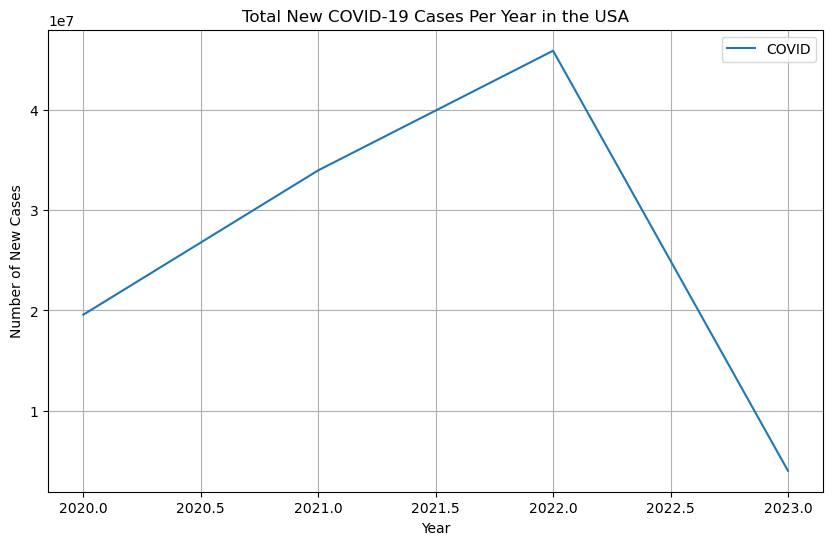

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(usa_covid, label = 'COVID')
plt.title('Total New COVID-19 Cases Per Year in the USA')
plt.xlabel('Year')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.show()

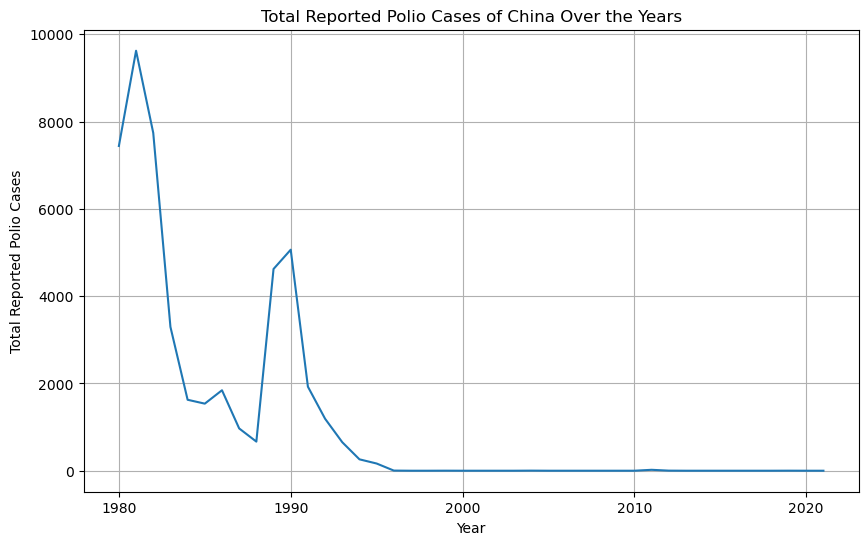

In [274]:
plt.figure(figsize=(10, 6))
plt.plot(chn_polio['Year'], chn_polio['Total (reported) polio cases'])
plt.title('Total Reported Polio Cases of China Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported Polio Cases')
plt.grid(True)
plt.show()

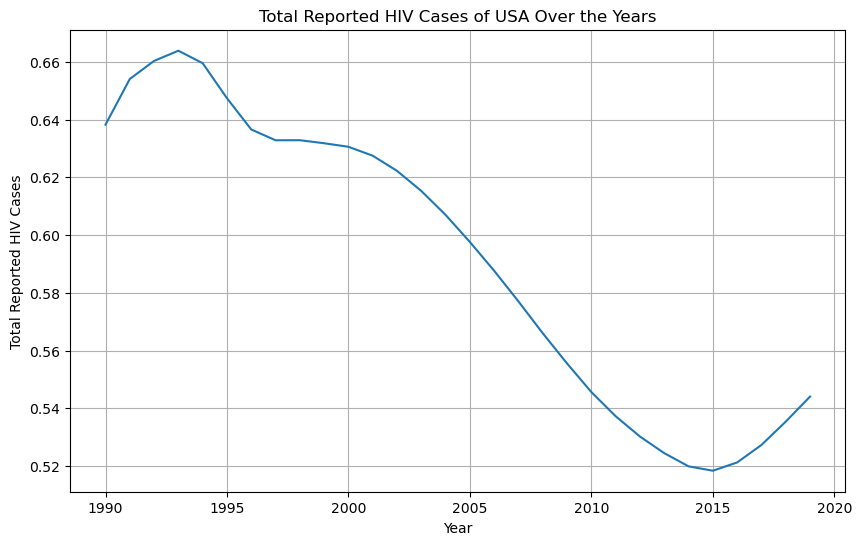

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(usa_hiv['Year'], usa_hiv['Current number of cases of hiv/aids per 100 people, in both sexes aged 15-49 years'])
plt.title('Total Reported HIV Cases of USA Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported HIV Cases')
plt.grid(True)
plt.show()

Hypothesis two

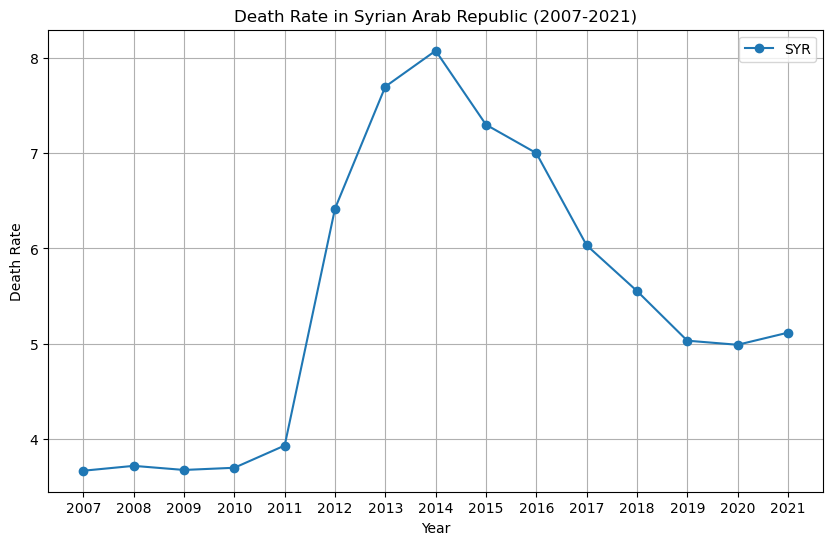

In [276]:
syrian_dt = functions.ext_sel_da(dr_data, 'SYR', 2007, 2021)
functions.plot_dt_draw(syrian_dt, 'SYR', 'Syrian Arab Republic', 1)

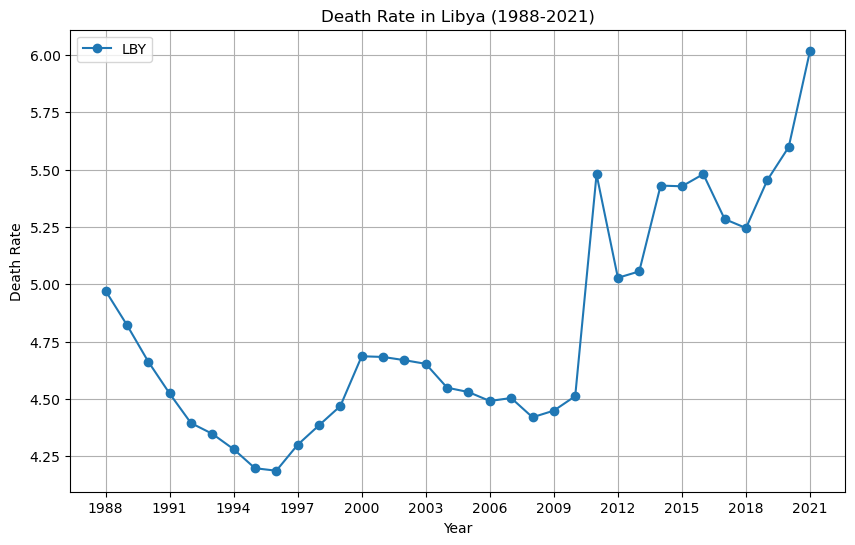

In [277]:
libya_dt = functions.ext_sel_da(dr_data, 'LBY', 1988, 2021)
functions.plot_dt_draw(libya_dt, 'LBY', 'Libya', 3)

Number of documented civilian deaths in the Iraq war from 2003 to October 2023

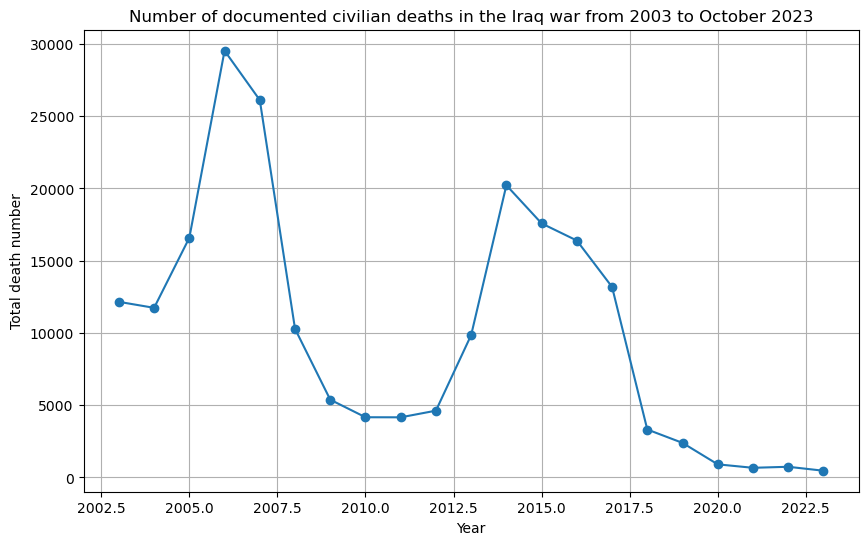

In [278]:
iraq_death_ct = iraq_death[['Year', 'Death number']]
plt.figure(figsize=(10, 6))
plt.plot(iraq_death_ct['Year'], iraq_death_ct['Death number'], marker='o')
plt.title('Number of documented civilian deaths in the Iraq war from 2003 to October 2023')
plt.xlabel('Year')
plt.ylabel('Total death number')
plt.grid(True)
plt.show()

Battle-related deaths (number of people) - Afghanistan

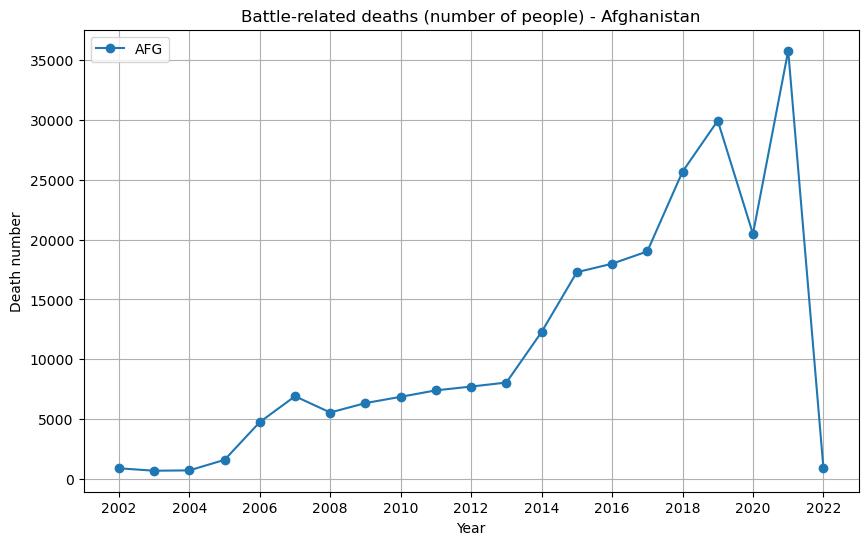

In [279]:
afg_dt = functions.ext_sel_da(bt_death, 'AFG', 2002, 2022)
afg_years = list(map(int, afg_dt.keys()))
afg_rates = list(afg_dt.values())
plt.figure(figsize=(10, 6))
plt.plot(afg_years, afg_rates, label='AFG', marker='o')
plt.xticks(range(min(afg_years), max(afg_years) + 1, 2))
plt.title("Battle-related deaths (number of people) - Afghanistan")
plt.xlabel("Year")
plt.ylabel("Death number")
plt.grid(True)
plt.legend()
plt.show()